<img src="https://images.fineartamerica.com/images-medium-large-5/rocks-balancing-on-driftwood-sea-in-dimitri-otis.jpg">

<h1>Stability of systems of linear ODEs</h1>
Consider a system of two linear differential equations

$$
\begin{equation}\left\{
\begin{aligned}
\dot{x} &= a x + b y \\
\dot{y} &= c x + d y
\end{aligned}\right.\tag{EQ1}
\end{equation}
$$

where $a,b,c,d$ are arbitrary real numbers.
It is conventional to represent such a system with a matrix of coefficients:
\begin{equation}
A=
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
\end{equation}


<h1>Question 1</h1>

Clearly $(0,0)$ is a fixed point.
Let $\tau=\lambda_1 +\lambda_2$ and $\Delta=\lambda_1 \lambda_2$, then the fixed point of the linear system with two equations is:

(a) a saddle node when $\Delta < 0$;

(b) a stable node when $\Delta > 0$ and $\tau < 0$;

(c) an unstable node when $\Delta > 0$ and $\tau > 0$;

(d) a spiral when $\Delta > 0$ and $|\tau| < 2 \cdot \sqrt A$

(e) a centre when $\Delta > 0$ and $\tau = 0$

    

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d


def AnalyseLinSys(A):

    def F1(v, t):
        x,y = v

        dx = A[0,0]*x + A[0,1]*y
        dy = A[1,0]*x + A[1,1]*y

        return [dx,dy]

    A = np.array(A)

    det = A[0,0]*A[1,1] - A[0,1]*A[1,0]
    tau = A[0,0]+A[1,1]

    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
    plt.figure(figsize=(5,1))

    ax1.plot(det,tau,'*',markersize=20)
    xmax=max(2, det)
    xmin=min(-1, det)
    ymin=min(-4, tau)
    ymax=max(4, tau)

    ax1.set_xlim((xmin, xmax))
    ax1.set_ylim((ymin, ymax))
    ax1.plot([0, 0],[ymin, ymax],'k')
    ax1.plot([xmin, xmax],[0, 0],'k')

    t = np.linspace(ymin, ymax, 100)
    ax1.plot(t**2/4, t)
    ax1.grid()
    ax1.set_xlabel('Det')
    ax1.set_ylabel('Tau')
    ax1.set_title('Stability diagram')

    phi=np.linspace(0,2*np.pi,16)

    x0=np.vstack((np.sin(phi), np.cos(phi)))
    x1=np.vstack((np.sin(phi+np.pi/16), np.cos(phi+np.pi/16)))*3/2
    x2=np.vstack((np.sin(phi), np.cos(phi)))/100
    x0=np.hstack((x0,x1,x2))

    ax2.plot(x0[0,:],x0[1,:],'.k')

    t = np.linspace(0, 100, 1000)
    for i in range(0,x0.shape[1]):
        ys = odeint(F1, x0[:,i], t)
        ax2.plot(ys[:,0],ys[:,1],'-')

    ax2.set_xlim((-2,2))
    ax2.set_ylim((-2,2))
    ax2.set_title('Phase portrait')
    ax2.grid()

    print('Det: %f, Tau: %f'%(det , tau) )
    plt.show()
# This cell contains axuliarry code. Simply run it once at the beginning


<h1> Question 2</h1>
Below you can see a routine that takes the matrix of coefficients $A$ and visualises the corresponding $(\tau,\Delta)$ with a star (<it>left panel</it>). The routine also produces several trajectories of the dynamical system that start around the fixed point (<it>right panel</it>). The initial conditions are indicated with a dot in the portrait.

(a) Run the cell below and explain why the pattern of the trajectories irradiates away form the fixed point. This pattern is called unstable star.

The pattern originates because both eigenvalues are positive and equal, as such we have a degenrate source where both eigenveector components grow at the same rate, making a line.

---


(b) Make several small changes to the coefficients of $A$ and explain the behaviour of the trajectories. Try to reproduce several qualitatively different classes of stability, both stable and unstable.

Done!

---


(c) Go through the templates T1-T7 and classify them. Annotate their stability classes with appropriate comments in the code. (N.B. comments start with character '#') Then, take a sheet of paper and by looking at each phase portrait try to draw the curves for $x(t)$ and $y(t)$.

Done!

---

(d) Can you reproduce the "centre"? (*i.e*. the case when the system is periodic.)

Done!

---

(e) Now, try this
\begin{equation}
A=
\begin{bmatrix}
0.02 & 1\\
-1 & 0
\end{bmatrix}
\end{equation}
Explain what do you see and why.   

It is a spiral which stability point is very close to the "center" configuration.

---   






Det: 0.250000, Tau: 1.000000


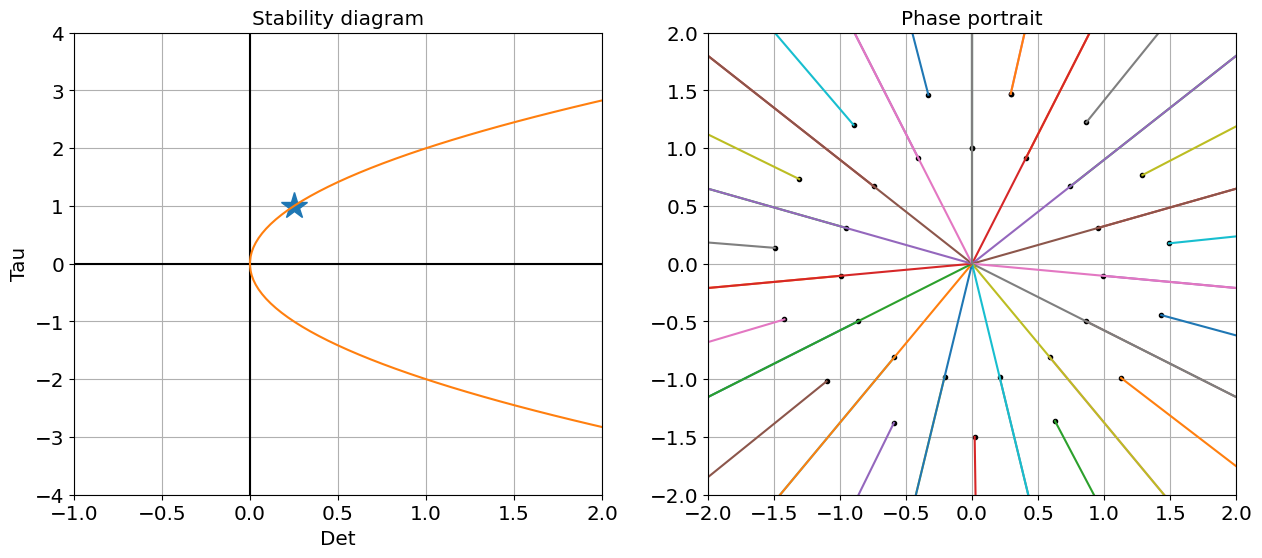

<Figure size 500x100 with 0 Axes>

Det: 0.350000, Tau: 1.200000


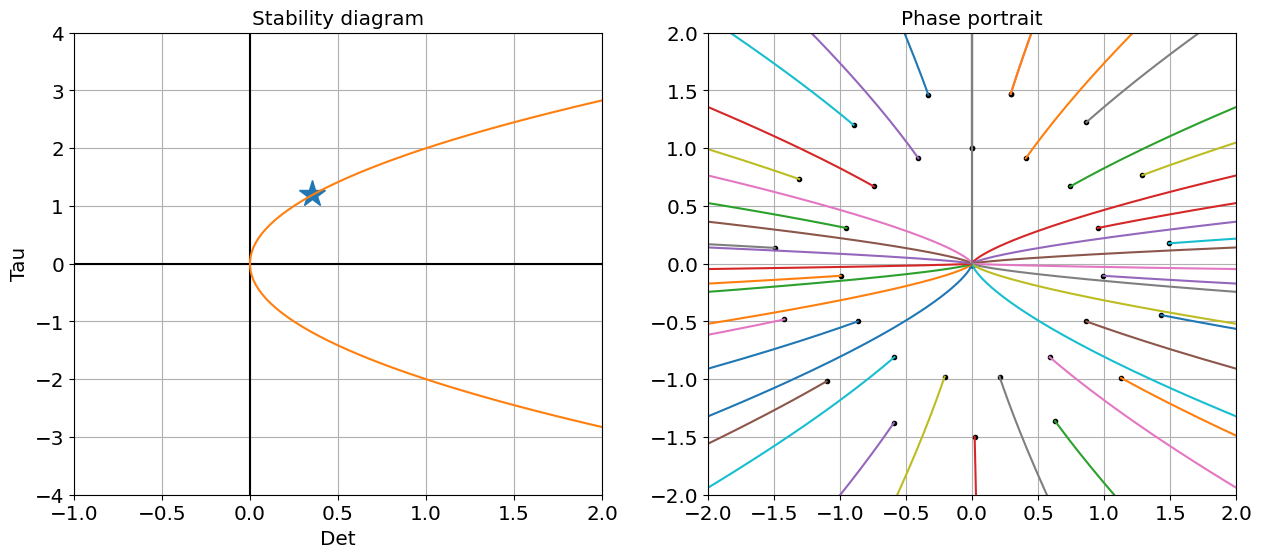

<Figure size 500x100 with 0 Axes>

Det: 1.000000, Tau: 0.300000


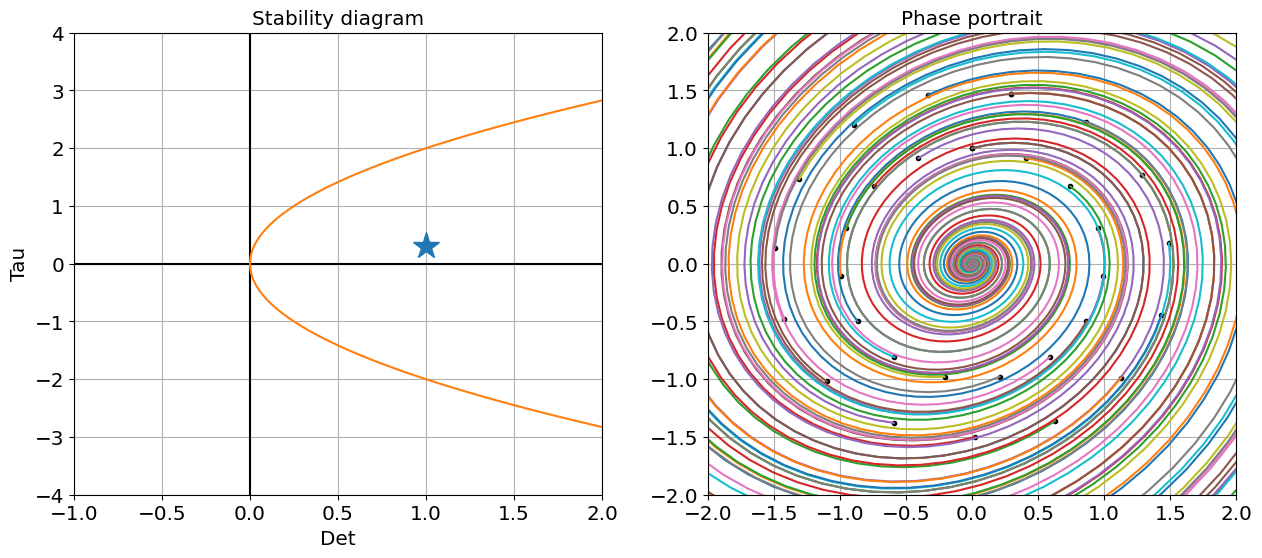

<Figure size 500x100 with 0 Axes>

Det: -0.250000, Tau: 0.000000


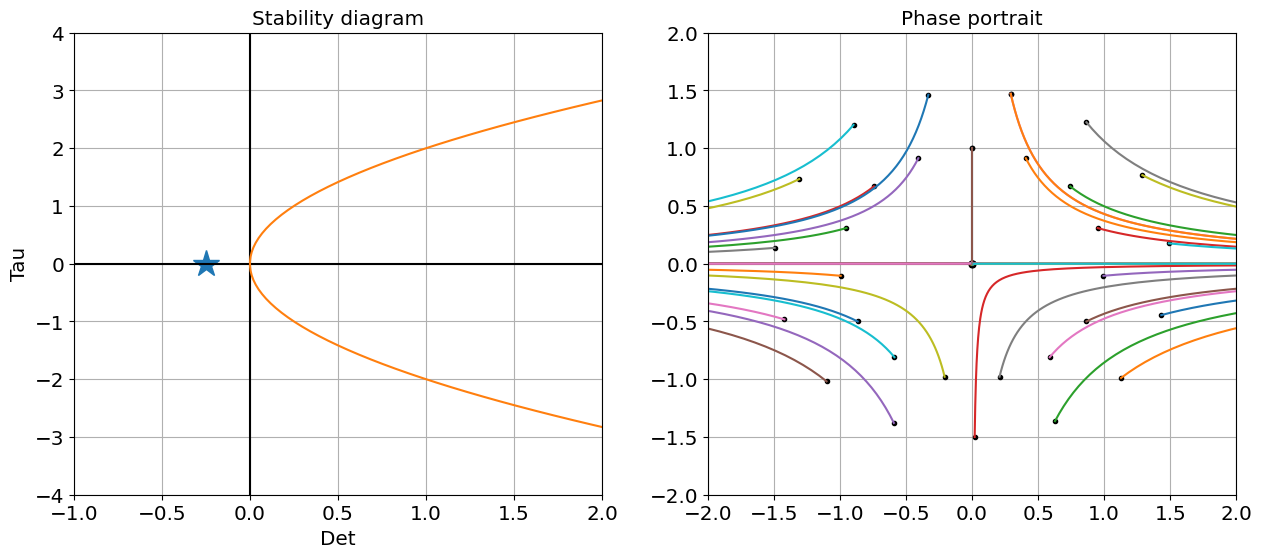

<Figure size 500x100 with 0 Axes>

Det: 1.000000, Tau: 0.000000


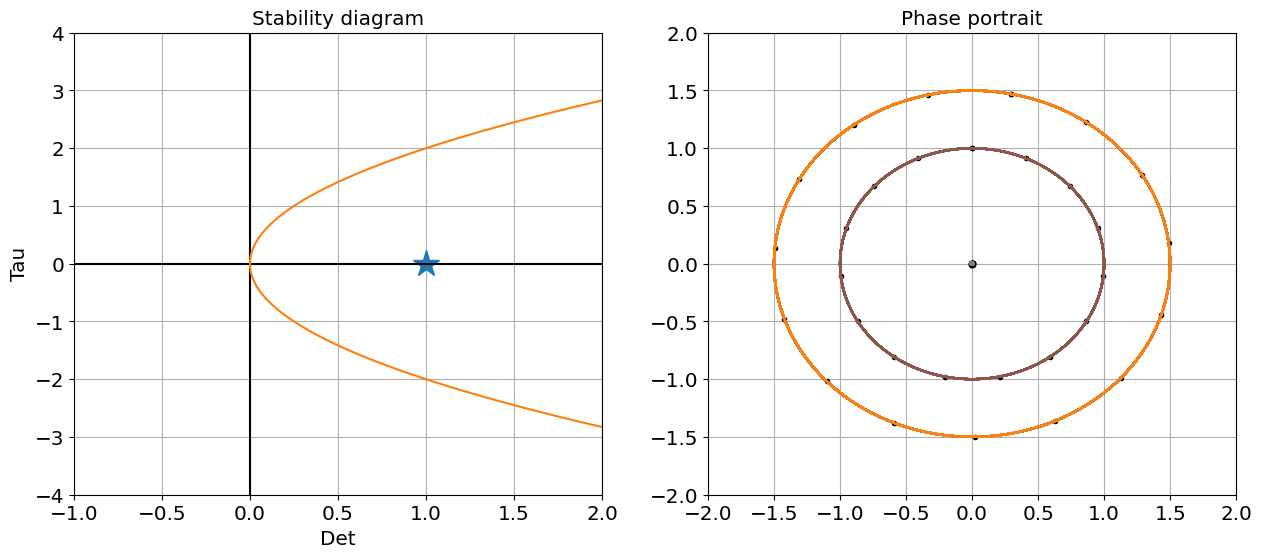

<Figure size 500x100 with 0 Axes>

In [21]:
# Modify here:
A=  [  [ 1/2, 0 ],
        [ 0, 1/2 ]]

AnalyseLinSys( A )


A=  [  [ 1/2 + 0.2, 0 ],
        [ 0, 1/2 ]]

AnalyseLinSys( A )


A=  [  [ 0, 1 ],
        [ -1, 0.3 ]]

AnalyseLinSys( A )


A=  [  [ 1/2, 0 ],
        [ 0, -1/2 ]]

AnalyseLinSys( A )

A=  [  [ 0, 1 ],
        [ -1, 0]]

AnalyseLinSys( A )


Det: 1.000000, Tau: -2.000000


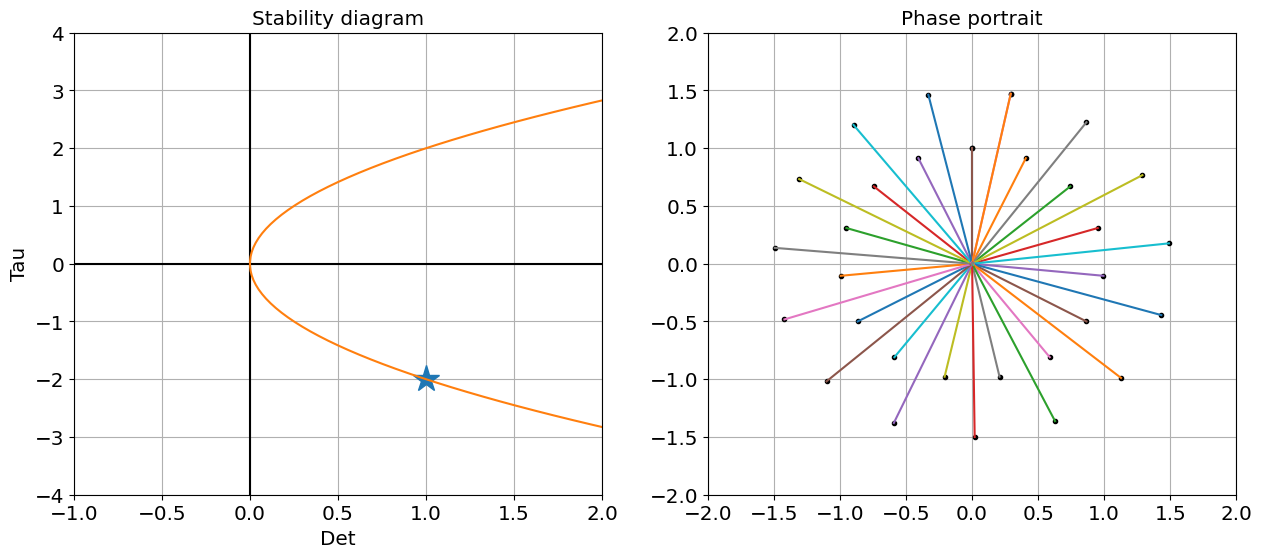

<Figure size 500x100 with 0 Axes>

Det: 5.000000, Tau: -2.000000


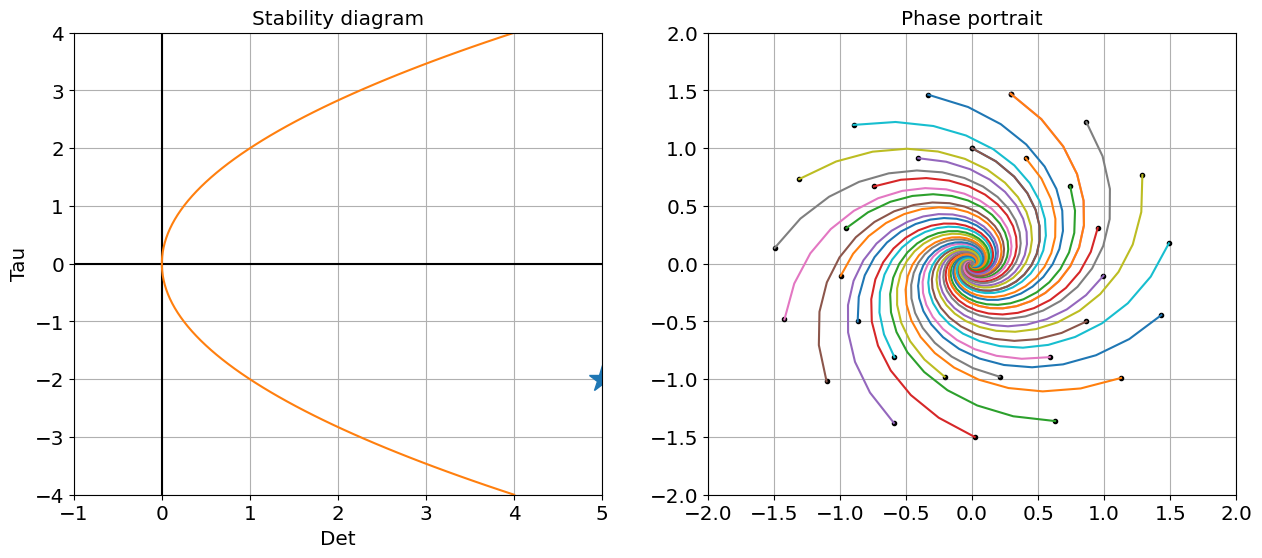

<Figure size 500x100 with 0 Axes>

Det: 5.000000, Tau: 2.000000


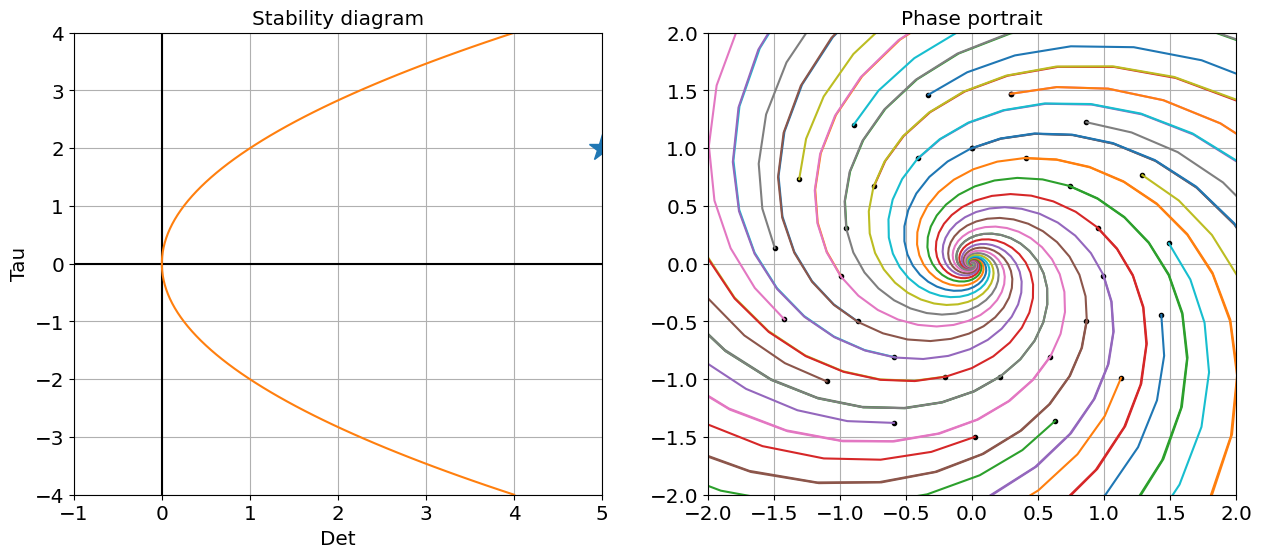

<Figure size 500x100 with 0 Axes>

Det: 0.000000, Tau: 0.000000


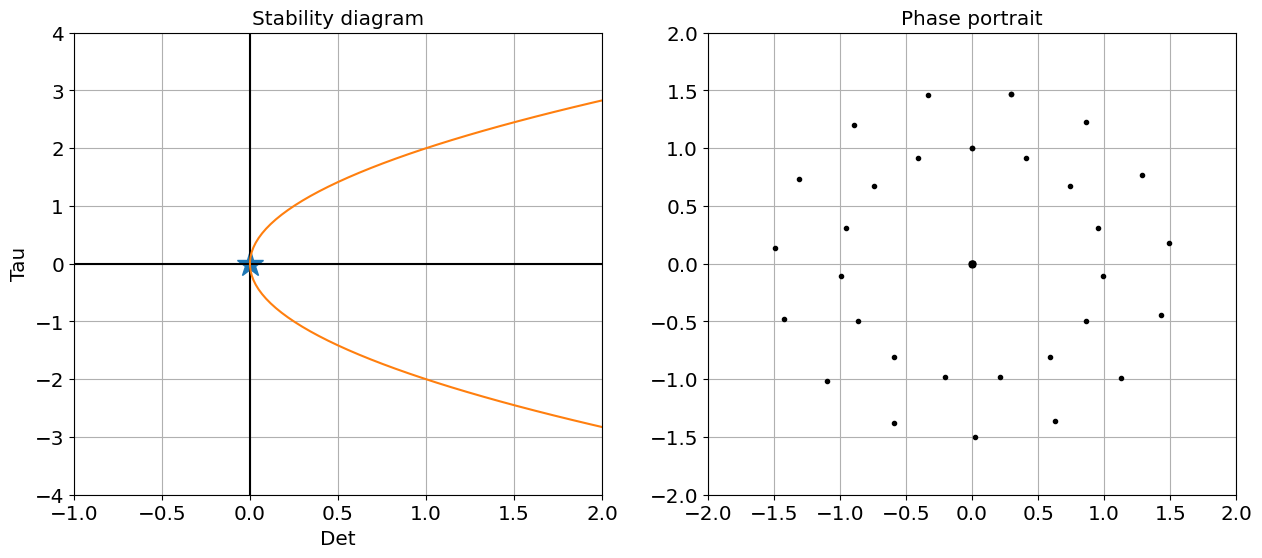

<Figure size 500x100 with 0 Axes>

Det: 0.000000, Tau: 1.000000


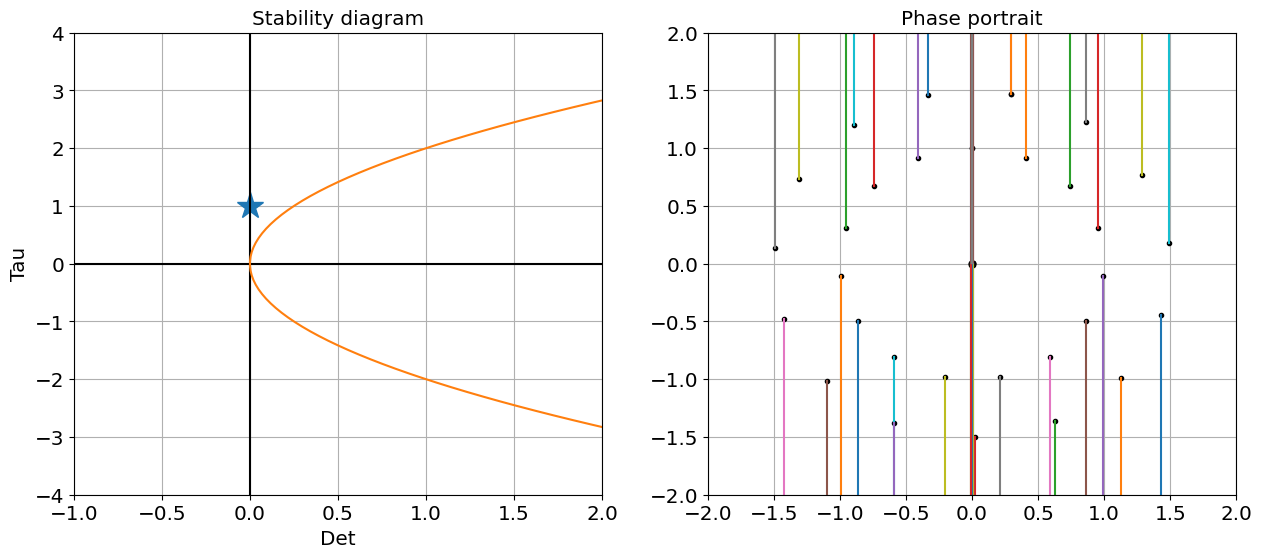

<Figure size 500x100 with 0 Axes>

Det: 0.000000, Tau: 1.000000


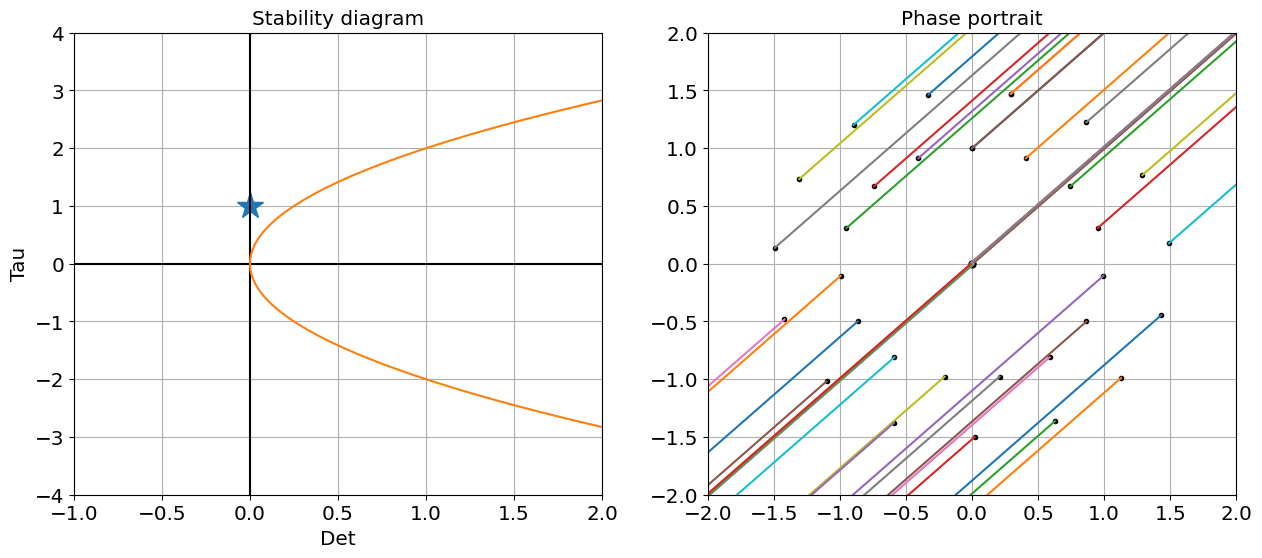

<Figure size 500x100 with 0 Axes>

Det: -0.250000, Tau: 0.000000


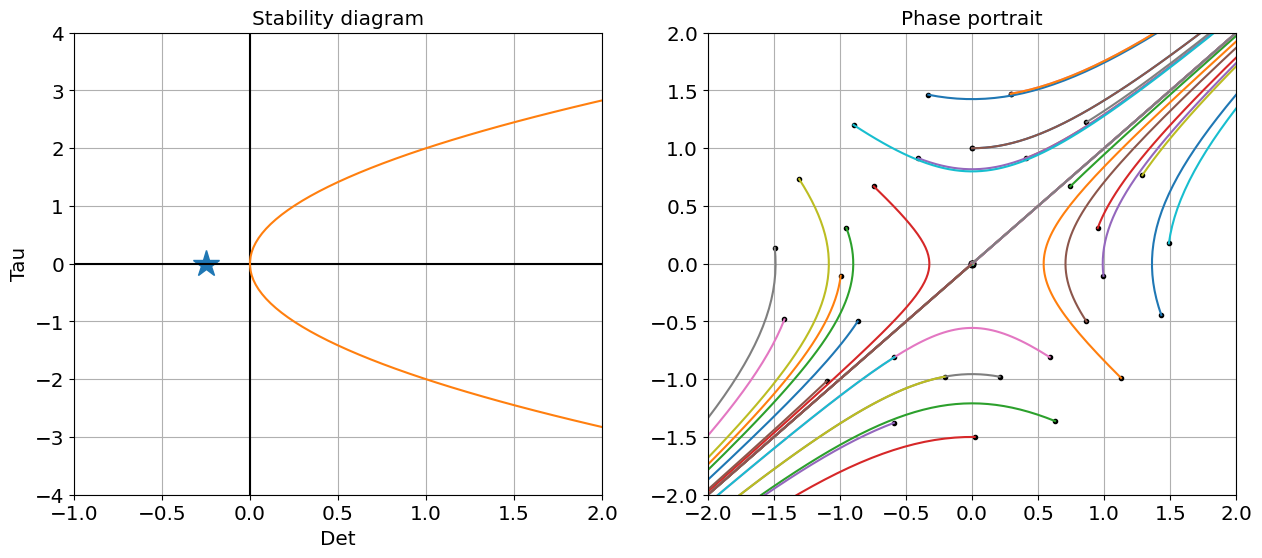

<Figure size 500x100 with 0 Axes>

In [22]:
# Examples:

# Degenerate sink
# We have x(t) = C1 * exp(-t) and y(t) = C2 * exp(-t)
T1 = [  [ -1, 0 ],
        [ 0, -1 ] ]


# Spiral sink
T2 = [  [ -1, 2 ],
        [ -2, -1 ]]

# Spiral Source
T3 = [  [ 1, 2 ],
        [ -2, 1 ]]

# Fixed Points only
T4 = [  [ 0, 0 ],
        [ 0, 0 ]]

# Line of source points
T5 =  [  [ 0, 0 ],
        [ 0, 1 ]]

# Line of source points
T6 =  [  [ 0, 1 ],
        [ 0, 1 ]]

# Saddle
T7 =  [  [ 0, .5 ],
        [ .5, 0 ]]

AnalyseLinSys( T1 )
AnalyseLinSys( T2 )
AnalyseLinSys( T3 )
AnalyseLinSys( T4 )
AnalyseLinSys( T5 )
AnalyseLinSys( T6 )
AnalyseLinSys( T7 )

<h1> The system of non-linear differential equations </h1>

The following set of ODEs is a model of the oscillating chemical clock:

$$
\begin{equation}
    \begin{aligned}
        \dot{x} = &a-x+x^2y\\
        \dot{y} = &b-x^2y
    \end{aligned}
\end{equation}
$$


<h1> Question 2</h1>

(a) Find the fixed point $(x^* ,y^*)$ of EQ2, and insert your solution in the code below within the $<Modify\;A>$ tags. Verify your results with the phase portraits produced by the code below:

$$
\begin{align*}
    \begin{cases}
        0 = a-x+x^2y
        \\[0.2cm]
        0 = b-x^2y
    \end{cases} &\hArr 

    \begin{cases}
        a = x - x^2y
        \\[0.2cm]
        b = x^2y
    \end{cases}  
    \\[0.6cm]
    
    &\hArr \begin{cases}
        x = a + b
        \\[0.2cm]
        b = (a+b)^2y
    \end{cases}
    \\[0.6cm]

    &\hArr \begin{cases}
        x = a + b
        \\[0.2cm]
        y = \frac{b}{(a+b)^2}
    \end{cases}
\end{align*}
$$

(b) Recall that the Jacobian of a mapping $x\to f(x,y), y \to g(x,y)$ is given by
\begin{equation}
J=
\begin{bmatrix}
\frac{\partial f}{ \partial x} & \frac{\partial f}{ \partial y}\\
\frac{\partial g}{ \partial x} & \frac{\partial g}{ \partial y}\\
\end{bmatrix}
\end{equation}
Linearise EQ2 at the fixed point by first calculating the jacobian and then substituting $x=x^*$ and $y=y^*$ into it.

\begin{equation}
J =
\begin{bmatrix}
2xy - 1 & x^2\\[0.2cm]
-2xy & -x^2\\
\end{bmatrix} = 
\begin{bmatrix}
\frac{2b}{a+b} - 1 & (a+b)^2\\[0.2cm]
-\frac{2b}{a+b} & -(a+b)^2\\
\end{bmatrix}
\end{equation}

Calculate $\tau$ and $\Delta$ and insert them into the code within $<Modify\;B>$ tags.
Now, run the code and look at the stability diagram. Could the diagram fully explain the observed behaviour? Is there a combination of parameters for which the fixed point is the saddle node?

(c)  Explore the parameter space by varying $a$ and $b$. Can you make the fixed point to become stable? What does this mean for the oscillator?

(d) Experiment with parameters by fixing $b=0.5$ and choosing $a$ from {0.1, 0.125, 0.15, 0.15, 0.175, 0.2}. What happens to the limit cycle when the fixed point transits from unstable to stable regime.


_________
$^*$ Here is a youtube video about chemical oscillators
<a href="https://youtu.be/_gyzhvMLImg?t=141">chemical oscillators </a>   
    



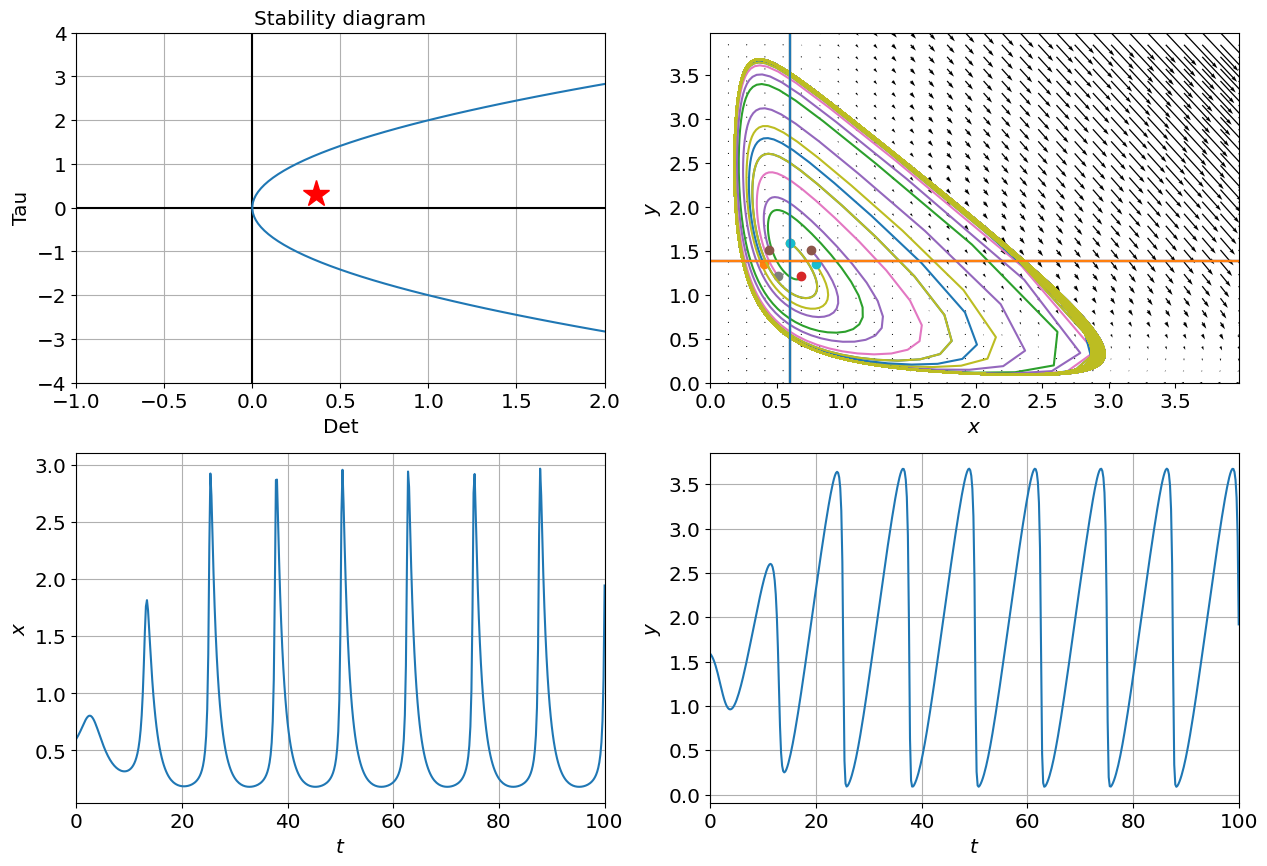

<Figure size 500x100 with 0 Axes>

In [24]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)


# Parameters:
a = 0.1
b = 0.5

#<Modify A>
x_star = a + b
y_star = b / (a+b)**2
#</Modify A>


#<Modify B>
Jac = [[2 * x_star * y_star - 1, x_star**2], [-2 * x_star * y_star, -x_star**2]]
det = Jac[0][0] * Jac[1][1] - Jac[0][1] * Jac[1][0]
tau = Jac[0][0] + Jac[1][1]
#</Modify B>

f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 10));
plt.figure(figsize=(5,1))

ax1.plot(det,tau,'r*',markersize=20)
xmax=max(2,det)
xmin=min(-1,det)
ymin=min(-4,tau)
ymax=max(4,tau)

ax1.set_xlim((xmin,xmax))
ax1.set_ylim((ymin,ymax))
ax1.plot([0,0],[ymin,ymax],'k')
ax1.plot([xmin,xmax],[0,0],'k')

t = np.linspace(ymin,ymax,100)
ax1.plot(t**2/4,t)
ax1.grid()
ax1.set_xlabel('Det')
ax1.set_ylabel('Tau')
ax1.set_title('Stability diagram')



scale = np.mean([ (a + b), b/(a + b)**2 ])*4;
x_max = scale;
y_max = scale;

def F2(v,tau):
    x, y = v
    dx = a - x +y*x**2
    dy = b - x**2*y
    return np.array([ dx, dy ])

x = np.linspace(0, x_max, 30)
y = np.linspace(0, y_max, 30)
X, Y = np.meshgrid(x, y)

u, v = np.zeros(Y.shape), np.zeros(Y.shape)

NI, NJ = Y.shape

for i in range(NI):
    for j in range(NJ):
        x = X[i, j]
        y = Y[i, j]
        yprime = F2([x, y],0)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

Q = ax2.quiver(X, Y, u, v, color='k')

ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_xlim([0, x_max]);
ax2.set_ylim([0, y_max]);


phi=np.linspace(0,2*np.pi,8)
x0=np.vstack((np.sin(phi), np.cos(phi)))/5
t = np.linspace(0, 2000, 10000)
for i in range(0,x0.shape[1]):
    ys = odeint(F2, x0[:,i]+ np.array([x_star,y_star]), t)
    ax2.plot(ys[:,0], ys[:,1], '-') # path
    ax2.plot([ys[0,0]], [ys[0,1]], 'o') # start
    ax2.plot([x_star,x_star], [0, y_max ])
    ax2.plot([0,x_max], [y_star, y_star ])


ax3.plot(t,ys[:,0])
ax3.set_ylabel('$x$')
ax3.set_xlabel('$t$')
ax3.set_xlim((0, 100))
ax3.grid()

ax4.plot(t,ys[:,1])
ax4.set_ylabel('$y$')
ax4.set_xlabel('$t$')
ax4.set_xlim((0, 100))

ax4.grid()
plt.show()

<h1>Question 3</h1>
One can see that our non-linear system features a new type of behaviour not seen in the linear case  --  a <b>limit cycle</b>. A limit cycle means that  the dynamical system has a periodic orbit, and, when disturbed, the system falls back to the *same* periodic orbit.

(a) Due to such a robustness, the oscillator reliably performs its function. (For instance, the period does not drift away if thre are random perturbations.) Compare this situation with that of Question 1e, where dynamical system is also periodic, however, a small perturbation slowly drifts the orbit away in a manner of an unwinding spiral.

(b) To reach such a limiting cycle from the fixed point, the later has to be unstable.
We already have built a stability diagram in the system of coordinates ($\tau$, $\Delta$).
For which parameters of $(a,b)$ the fixed point is unstable and therefore system may reach the limit cycle?  Modify the code swiping through all combinations of $(a,b)\in[0,1]^2$ below to produce the bifurcation diagram.

(c) Explain what happens to the eigenvalues of the Jacobian matrix when the system transits from the stable to the unstable region?





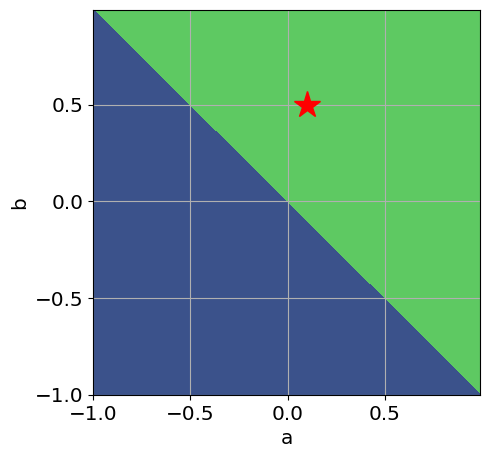

In [4]:


A, B = np.meshgrid(np.arange(-1.0, 1.0, 0.01),np.arange(-1.0, 1.0, 0.01))

# <Modify>
Tau = A+B
# </Modify>

fig, ax = plt.subplots(figsize=(5,5))
ax.contourf(A,B,Tau,[-10000, 0, 10000])
ax.plot(a,b,'r*',markersize=20)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_xticks(np.arange(-1, 1, 0.5))
ax.set_yticks(np.arange(-1, 1., 0.5))
ax.grid((3,3))

plt.show()
